# REDO 💚 Homework 2: Multi-Layer Perceptron 💚

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [52]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
display(X_train.shape)

(60000, 28, 28)

label for image: 3


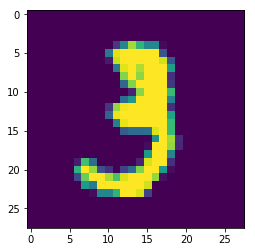

In [36]:
plt.imshow(X_train[10])
print('label for image: {}'.format(y_train[10]))

label for image: 0


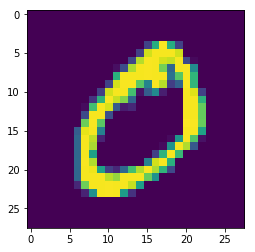

In [37]:
plt.imshow(X_train[1])
print('label for image: {}'.format(y_train[1]))

label for image: 2


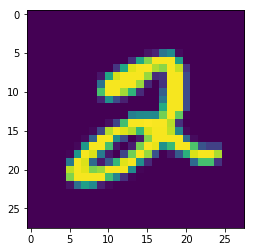

In [38]:
plt.imshow(X_train[5])
print('label for image: {}'.format(y_train[5]))

In [39]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


### Reshape (flatten 2D -> 1D)?

In [50]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
display(y_train[1])
display(y_train.shape)
y_test.shape
X_train.shape

0

(60000,)

(60000, 784)

### Normalize

In [41]:
X_train /= 255 #divide X_train by 255
X_test /= 255

In [42]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
display(y_train.shape)
y_test.shape

(60000, 10)

(10000, 10)

### Yay model time

In [43]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                650       
Total params: 724,826
Trainable params: 724,826
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.7879 - acc: 0.8013 - val_loss: 0.3354 - val_acc: 0.9037
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.3047 - acc: 0.9123 - val_loss: 0.2566 - val_acc: 0.9268
Epoch 3/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.2448 - acc: 0.9293 - val_loss: 0.2152 - val_acc: 0.9383
Epoch 4/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.2078 - acc: 0.9404 - val_loss: 0.1911 - val_acc: 0.9447
Epoch 5/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1818 - acc: 0.9471 - val_loss: 0.1680 - val_acc: 0.9502
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1602 - acc: 0.9541 - val_loss: 0.1591 - val_acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1434 - acc: 0.9587 - val_loss: 0.1391 - 

### Hmm, that accuracy doesn't look so good. Let's try again with some more layers

In [45]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_50 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                330       
Total params: 859,962
Trainable params: 859,962
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.8680 - acc: 0.7588 - val_loss: 0.3209 - val_acc: 0.9086
Epoch 2/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.2769 - acc: 0.9211 - val_loss: 0.2391 - val_acc: 0.9292
Epoch 3/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.2056 - acc: 0.9413 - val_loss: 0.1814 - val_acc: 0.9472
Epoch 4/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.1656 - acc: 0.9509 - val_loss: 0.1521 - val_acc: 0.9559
Epoch 5/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1389 - acc: 0.9598 - val_loss: 0.1389 - val_acc: 0.9584
Epoch 6/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.1204 - acc: 0.9650 - val_loss: 0.1273 - val_acc: 0.9639
Epoch 7/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.1047 - acc: 0.9694 - val_loss: 0.

### Let's halve the batch size and see how that affects the model's accuracy.

In [48]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0751 - acc: 0.9773 - val_loss: 0.0958 - val_acc: 0.9713
Epoch 2/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0613 - acc: 0.9813 - val_loss: 0.0998 - val_acc: 0.9700
Epoch 3/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0484 - acc: 0.9861 - val_loss: 0.0834 - val_acc: 0.9764
Epoch 4/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0402 - acc: 0.9885 - val_loss: 0.0878 - val_acc: 0.9737
Epoch 5/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0325 - acc: 0.9910 - val_loss: 0.0814 - val_acc: 0.9768
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0267 - acc: 0.9927 - val_loss: 0.1714 - val_acc: 0.9549
Epoch 7/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0227 - acc: 0.9940 - val_loss: 0.

# Try again another way

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

### Reshape

In [5]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Convert class vectors to binary class matrices

In [6]:
y_train = keras.utils.to_categorical(y_train, 10) #because 10 = number of classes
y_test = keras.utils.to_categorical(y_test, 10)
display(y_train.shape)
display(y_test.shape)

(60000, 10)

(10000, 10)

### Model time woo hoooo

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
tensor_board = TensorBoard(log_dir='./Graph')

In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, callbacks = [tensor_board], validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.8648 - acc: 0.7356 - val_loss: 0.4142 - val_acc: 0.8761
Epoch 2/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.3720 - acc: 0.8903 - val_loss: 0.3027 - val_acc: 0.9111
Epoch 3/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.2948 - acc: 0.9129 - val_loss: 0.2558 - val_acc: 0.9226
Epoch 4/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.2430 - acc: 0.9279 - val_loss: 0.2204 - val_acc: 0.9338
Epoch 5/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.2028 - acc: 0.9395 - val_loss: 0.1873 - val_acc: 0.9428
